In [1]:
import os
import numpy as np
from ase import Atoms
import ase.visualize
from ase.units import Bohr
from pyscf import gto, scf, mp, cc, dft
import glob
from matplotlib import pyplot as plt

import pandas as pd
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
from parse_density_files import CUBE
import alchemy_tools2 as at
import explore_qml_data as eqd


In /home/misa/anaconda3/envs/atomic-energies/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/misa/anaconda3/envs/atomic-energies/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/misa/anaconda3/envs/atomic-energies/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/misa/anaconda3/envs/atomic-energies/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

In [2]:
def get_data(data):
#     e_npbc = []
#     for d in data:
#         e_npbc.append(d['e_nbpc'])
#     e_npbc = np.array(e_npbc)
    
#     e_scaled = []
#     for d in data:
#         e_scaled.append(d['e_scaled'])
#     e_scaled = np.array(e_scaled)

    e_el = []
    for k in data.keys():
        e_el.append(data[k]['e_el'])
    e_el = np.array(e_el)

#     e_tot = []
#     for d in data:
#         e_tot.append(d['e_tot'])
#     e_tot = np.array(e_tot)

    alchpots = []
    for k, e in zip(data.keys(), e_el):
        alchpots.append(e/data[k]['nuclei'][:,0])
    alchpots = np.array(alchpots)
    
    #return(alchpots, e_el, e_npbc, e_scaled, e_tot)
    return(alchpots, e_el)

### alkane chains 

In [26]:
basepath = '/home/misa/projects/Atomic-Energies/data/ueg_reference/amons'

compounds = ['amon_000001', 'amon_000010', 'amon_000036', 'amon_000138']

data = {'methane':0, 'ethane':0, 'propane':0, 'butane':0}
for k, c in zip(data.keys(), compounds):
    data[k] = uqm.load_obj(os.path.join(basepath, c+'/results.dict'))


alchpots, e_el= get_data(data)

#### Electronic energy vs $N_{\rm{e}}$

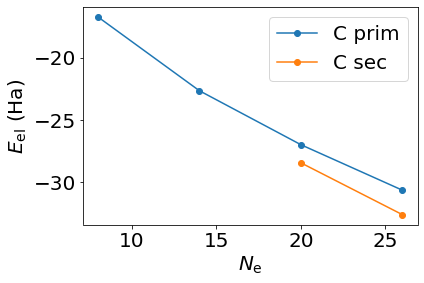

In [30]:
plt.rcParams['font.size'] = 20

num_ve = [8, 2*4+6, 3*4+3*2+2, 4*4+2*4+2]

# primary carbons
c_prim = [e_el[0][-1], e_el[1][0], e_el[2][0], e_el[3][0]]
plt.plot(num_ve, c_prim, '-o', label = 'C prim')

# secondary carbons
c_sec = [e_el[2][1], e_el[3][1]]
num_ve = [8, 2*4+6, 3*4+3*2+2, 4*4+2*4+2]
plt.plot(num_ve[2:], c_sec, '-o', label = 'C sec')


plt.xlabel(r'$N_{\rm{e}}$')
plt.ylabel(r'$E_{\rm{el}}$ (Ha)')
plt.legend()
#plt.savefig('/home/misa/projects/atomic-energies/figures/butanol_geometry/angle_dist_CO.svg', bbox_inches='tight')

- electronic energy increases with increasing number of valence electrons

#### $\mu(\lambda)$

Text(0, 0.5, '$\\mu_{\\rm{C\\_prim}}(\\lambda)$')

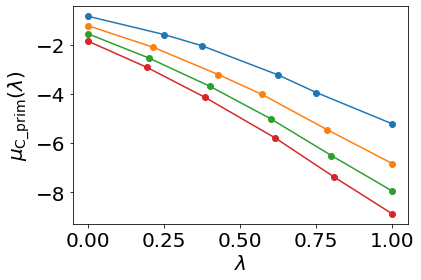

In [38]:
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(1,1)

ax.plot(data['methane']['lam_vals'], data['methane']['alchpots'][:,-1], '-o')
ax.plot(data['ethane']['lam_vals'], data['ethane']['alchpots'][:,0], '-o')
ax.plot(data['propane']['lam_vals'], data['propane']['alchpots'][:,0], '-o')
ax.plot(data['butane']['lam_vals'], data['butane']['alchpots'][:,0], '-o')

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$\mu_{\rm{C\_prim}}(\lambda)$')

- alchemical potentials differ already at $\lambda = 0$ because the box volume is different (difference is in the order of 1 Ha for $\mu$ -> 6 Ha for $E_I$
- the main reason for the increase is however the difference in stoichiometry/local environment because at $\lambda = 1$ the difference is 5 Ha and here box volume is irrelevant since all electrons are localized around the nuclei

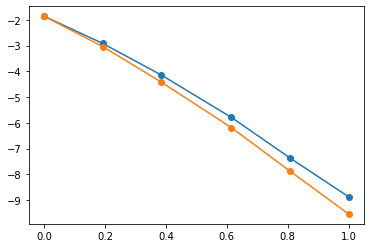

In [35]:
fig, ax = plt.subplots(1,1)

ax.plot(data['butane']['lam_vals'], data['butane']['alchpots'][:,0], '-o')
ax.plot(data['butane']['lam_vals'], data['butane']['alchpots'][:,1], '-o')

# $\mu(r)$

In [3]:
def atoms_wrapper(nu):
    """
    item of amon dict
    """
    coords = []
    elements = ''
    for line in amon[2:]:
        el, x, y, z = line.split()
        coords.append([float(x),float(y),float(z)])
        elements += el
    
    atoms_object = ase.Atoms(elements, coords)
    return(atoms_object)

In [5]:
# butane
mol = uqm.load_obj('/home/misa/projects/Atomic-Energies/data/ueg_reference/amons/amon_000138/results.dict')
mol_ase = Atoms(numbers=mol['nuclei'][:,0], positions=mol['nuclei'][:,1:]*Bohr)
mu_r = uqm.load_obj('/home/misa/projects/Atomic-Energies/data/ueg_reference/amons/amon_000138/mu_r')
der_mu = uqm.load_obj('/home/misa/projects/Atomic-Energies/data/ueg_reference/amons/amon_000138/d_mu_r')
mu_ref = uqm.load_obj('/home/misa/projects/Atomic-Energies/data/ueg_reference/amons/amon_000138/mu_ref')
der_ref = uqm.load_obj('/home/misa/projects/Atomic-Energies/data/ueg_reference/amons/amon_000138/d_mu_ref')

In [4]:
mol_ase.get_all_distances()[1]

array([1.53311699, 0.        , 2.58094224, 1.53766364, 2.19235881,
       2.18192174, 2.18223517, 1.09964087, 1.09855436, 2.8361765 ,
       2.88390237, 3.52599806, 2.16312694, 2.15729953])

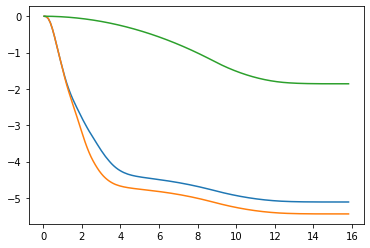

In [22]:
plt.plot(np.array(mu_r[0][0])*Bohr, mu_r[0][1])
plt.plot(np.array(mu_r[0][0])*Bohr, mu_r[1][1])

plt.plot(np.array(mu_ref[0])*Bohr, mu_ref[1])


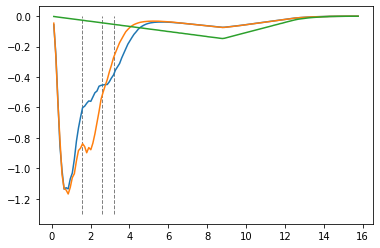

In [23]:
plt.plot(np.array(der_mu[0][0])*Bohr, der_mu[0][1])
plt.plot(np.array(der_mu[1][0])*Bohr, der_mu[1][1])

plt.plot(np.array(der_ref[0])*Bohr, der_ref[1])


plt.vlines([1.53311699, 2.58061199, 3.18426027], -1.3,0, linestyles='--', colors='grey', linewidths = 1)

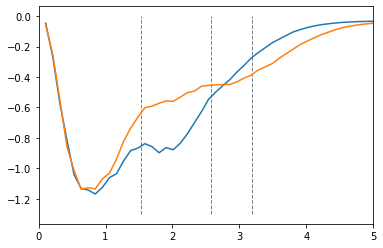

In [24]:
plt.plot(np.array(der_mu[1][0])*Bohr, der_mu[1][1])
plt.plot(np.array(der_mu[0][0])*Bohr, der_mu[0][1])

plt.xlim([0,5])
plt.vlines([1.53311699, 2.58061199, 3.18426027], -1.3,0, linestyles='--', colors='grey', linewidths = 1)